# RMSE Evolution

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from reco_systems.filter import filter_df
from reco_systems.CF_knn import calc_similarity_matrix, get_KNN
from reco_systems.user_game_matrix import get_matrix_user_game
from reco_systems.evaluation import *

In [2]:
folder = "database_cleaned"
avis_clean  = pd.read_csv(f"{folder}/avis_clean.csv", index_col=0)
jeux_clean  = pd.read_csv(f"{folder}/jeux_clean.csv", index_col=0)
users       = pd.read_csv(f"{folder}/users.csv", names=["Username", "User id"])

In [3]:
# Filter for min_reviews for users & games
min_reviews = 10
rev_filter = filter_df(avis_clean, min_reviews)

11201 10549
2086 2464
1800 2399
1792 2397
1791 2396


In [4]:
# generate user-game matrix
matrix_ratings, mask_ratings, users_table, games_table = get_matrix_user_game(rev_filter)

In [5]:
# cosine similarity matrix, set k = sqrt(nb users)
cos_sim_matrix = calc_similarity_matrix(matrix_ratings, mask_ratings, "cos")
k = int(np.sqrt(cos_sim_matrix.shape[0]))
cos_sim_matrix

eucl_sim_matrix = calc_similarity_matrix(matrix_ratings,mask_ratings,"euclidean")

In [6]:
 # Create association - User matrix index - User real id - Count reviews

users_ids =  rev_filter[["User id", "Game id"]].groupby("User id", as_index=True).count()
assoc = users_table.to_frame().merge(users_ids, left_on="User id", right_index=True).reset_index()
assoc.columns = ["User index", "User id", "Count reviews"]
assoc 

,User index,User id,Count reviews
0,0,0,38
1,1,1,724
2,2,2,330
3,3,3,255
4,4,4,12
...,...,...,...
1786,1786,9066,16
1787,1787,9433,20
1788,1788,9583,13
1789,1789,9596,15


In [7]:
test = calc_error(6,matrix_ratings,mask_ratings,cos_sim_matrix,"rmse_mae","cos",8)
test 

array([1.85265367, 1.35542693])

In [8]:
np.random.seed(2)
df_cos = calc_RMSE_MAE_mean(np.array([8,9,10,11,12,13,14,15]),assoc,200,1000,matrix_ratings,mask_ratings,cos_sim_matrix,dist_type="cos")
df_cos

8
2 2
9
2 2
10
2 2
11
2 2
12
2 2
13
2 2
14
2 2
15
2 2


,K,Type,Value
1,8,RMSE,1.393296
2,8,RMSE,2.010044
3,8,RMSE,1.813952
4,8,RMSE,2.086987
5,8,RMSE,1.892834
...,...,...,...
1196,15,MAE,1.662181
1197,15,MAE,1.886536
1198,15,MAE,1.670119
1199,15,MAE,1.679946


<Axes: xlabel='K', ylabel='Value'>

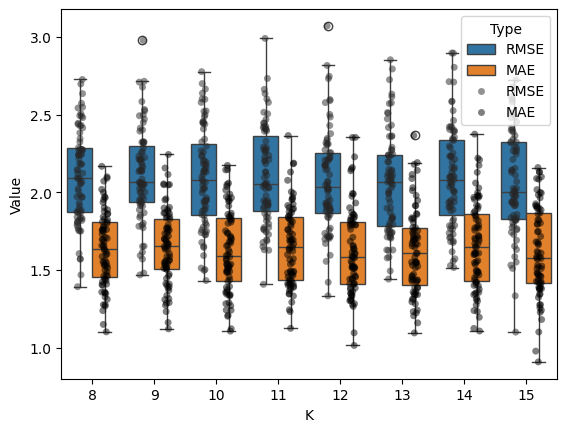

In [9]:
gfg = sns.boxplot(df_cos,x="K",y='Value', hue="Type")
sns.stripplot(df_cos,x="K",y="Value",hue="Type",dodge=True,alpha=0.5, palette='dark:black')

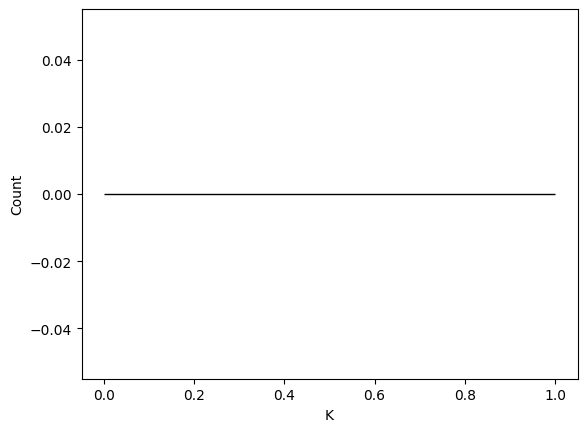

In [10]:
df_cos_nan = df_cos[np.isnan(df_cos['Value'])]
gfg_nan = sns.histplot(df_cos_nan,x="K")

In [11]:
df_eulc = calc_RMSE_MAE_mean(np.array([8,9,10,11,12,13,14,15]),assoc,200,300,matrix_ratings,mask_ratings,eucl_sim_matrix,"euclidean")

8


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 5 has size 1